In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
from time import time

In [27]:
import time    

time.gmtime()

1652784598

In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


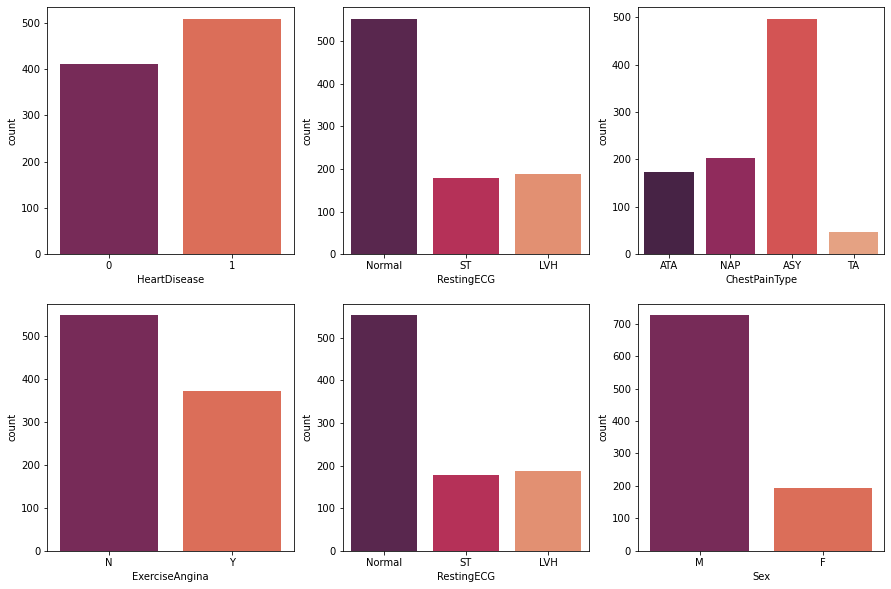

In [6]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x = df['HeartDisease'], data = df, palette='rocket', ax=axes[0,0])
sns.countplot(x = df['RestingECG'], data = df, palette='rocket', ax=axes[0,1])
sns.countplot(x = df['ChestPainType'], data = df, palette='rocket', ax=axes[0,2])

sns.countplot(x = df['ExerciseAngina'], data = df, palette='rocket', ax=axes[1,0])
sns.countplot(x = df['RestingECG'], data = df, palette='rocket', ax=axes[1,1])
sns.countplot(x = df['Sex'], data = df, palette='rocket', ax=axes[1,2])
plt.show()

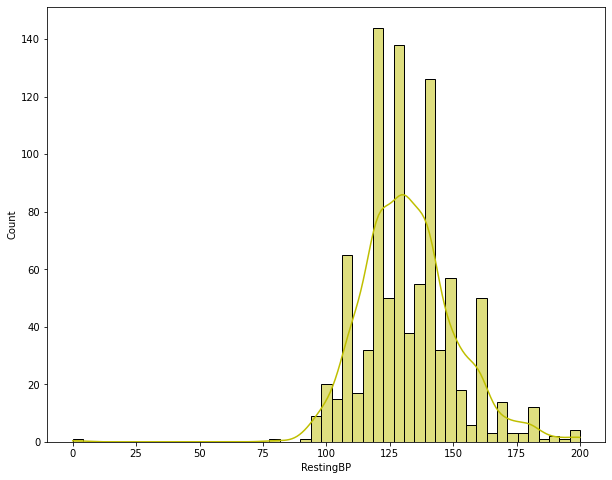

In [10]:
plt.figure(figsize = (10, 8))
sns.histplot(df['RestingBP'], color = 'y', kde=True)

plt.show()

<Figure size 1440x720 with 0 Axes>

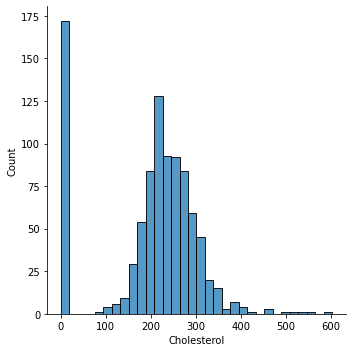

In [11]:
plt.figure(figsize = (20, 10))
sns.displot(df['Cholesterol'])
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:>

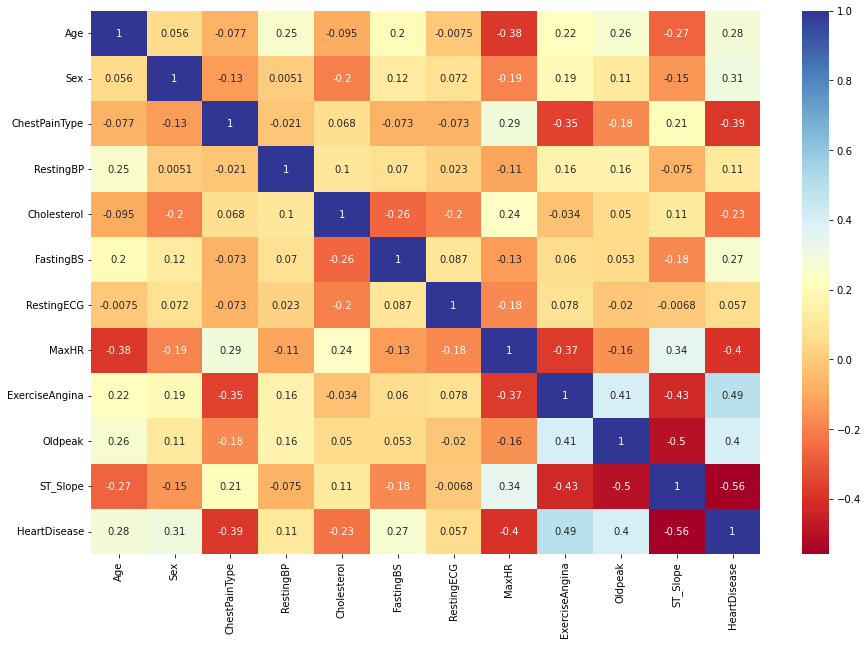

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

In [14]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (550, 11)
X_test:  (368, 11)
y_train:  (550,)
y_test:  (368,)


# AdaBoost Classifier 

In [16]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model = abc.fit(X_train, y_train)

In [17]:
y_pred_adaboost = model.predict(X_test)
print(y_pred_adaboost)

[0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]


In [18]:
from sklearn.metrics import accuracy_score

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Classifier Model Accuracy: 0.8396739130434783


# XGBoost Classifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model = gbc.fit(X_train, y_train)

In [20]:
y_pred_xgboost = model.predict(X_test)
print(y_pred_xgboost)

[0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]


In [21]:
from sklearn.metrics import accuracy_score

print("XGBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_xgboost))

XGBoost Classifier Model Accuracy: 0.8505434782608695


# Comparision between Adaboost and XGboost

<AxesSubplot:xlabel='accuracy', ylabel='algorithms'>

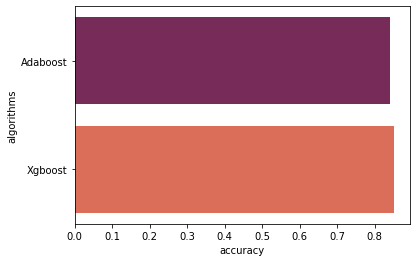

In [22]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Xgboost'],
    "accuracy": [accuracy_score(y_test, y_pred_adaboost),accuracy_score(y_test, y_pred_xgboost)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')

To conclude, we can say that Xgboost is slightly works better than Adaboost.